# 1.Introduction

**In this notebook, we will EDA dataset with Naturual Language Processing (NLP) technique and use classification to idenify fake news using different models to evaluate their performance on this task and analyzing their effectiveness.**


# 2. Use cases

**Recently, Fake news is becoming increasingly prevalent, and it can have serious implications. NLP can be used to detect and classify fake news in order to protect society from its damaging effects. Additionally, NLP can be used to identify topics and trends in news articles, which can be beneficial for research and news outlets.**

In [2]:
# Import library
import numpy as np
import pandas as pd
import os

# 3. Loading data, EDA and clean data

In [3]:
fake = pd.read_csv('./Dataset/Fake.csv')
fake['label_encode'] = 0
fake.head()

,title,text,subject,date,label_encode
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
true = pd.read_csv('./Dataset/True.csv')
true['label_encode'] = 1
true.head()

,title,text,subject,date,label_encode
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
df = pd.DataFrame()
df = true.append(fake)

/var/folders/zf/tcr1mfcs57q7qcs9w0485dpm0000gp/T/ipykernel_29646/1161961970.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = true.append(fake)


**Check the datatypes**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44898 non-null  object
 1   text          44898 non-null  object
 2   subject       44898 non-null  object
 3   date          44898 non-null  object
 4   label_encode  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


**Removing the duplicates and preventing problems with indexing.**

In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

**We can see that the date format is not the one we need. I will apply the appropriate date format for future purposes.**

In [8]:
# Correcting some data
df['date'] = df['date'].replace(['19-Feb-18'],'February 19, 2018')
df['date'] = df['date'].replace(['18-Feb-18'],'February 18, 2018')
df['date'] = df['date'].replace(['17-Feb-18'],'February 17, 2018')
df['date'] = df['date'].replace(['16-Feb-18'],'February 16, 2018')
df['date'] = df['date'].replace(['15-Feb-18'],'February 15, 2018')
df['date'] = df['date'].replace(['14-Feb-18'],'February 14, 2018')
df['date'] = df['date'].replace(['13-Feb-18'],'February 13, 2018')


df['date'] = df['date'].str.replace('Dec ', 'December ')
df['date'] = df['date'].str.replace('Nov ', 'November ')
df['date'] = df['date'].str.replace('Oct ', 'October ')
df['date'] = df['date'].str.replace('Sep ', 'September ')
df['date'] = df['date'].str.replace('Aug ', 'August ')
df['date'] = df['date'].str.replace('Jul ', 'July ')
df['date'] = df['date'].str.replace('Jun ', 'June ')
df['date'] = df['date'].str.replace('Apr ', 'April ')
df['date'] = df['date'].str.replace('Mar ', 'March ')
df['date'] = df['date'].str.replace('Feb ', 'February ')
df['date'] = df['date'].str.replace('Jan ', 'January ')

In [9]:
df['date'] = df['date'].str.replace(' ', '')

In [10]:
for i, val in enumerate(df['date']):
    df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce') # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)
df['date'] = df['date'].astype('datetime64[ns]')

/var/folders/zf/tcr1mfcs57q7qcs9w0485dpm0000gp/T/ipykernel_29646/1888028161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce') # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         44689 non-null  object        
 1   text          44689 non-null  object        
 2   subject       44689 non-null  object        
 3   date          44679 non-null  datetime64[ns]
 4   label_encode  44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [12]:
import datetime as dt
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

df['month'] = df['month'].astype(str)

## Non-text feature plotting

**Elicit insights from non-text features to get to know if they will help us boost the Text Classifier.**

In [13]:
sub = df[['month', 'label_encode']]
sub = sub.dropna()
sub = sub.groupby(['month'])['label_encode'].sum()

In [14]:
sub = sub.drop('NaT')

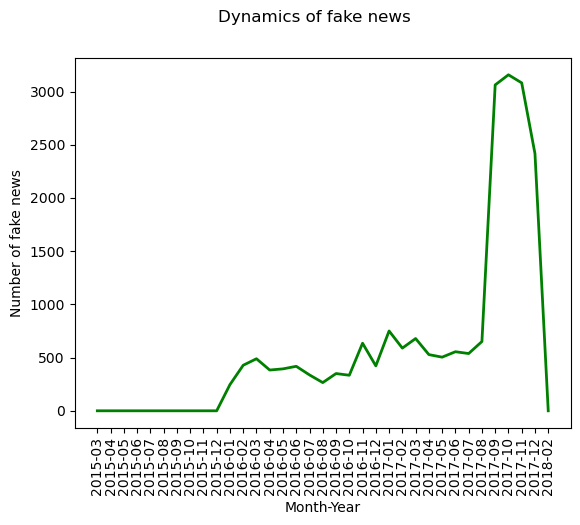

In [15]:
import matplotlib.pyplot as plt

plt.suptitle('Dynamics of fake news')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth=2, color='green')

**From the dataset, we can see that there is a spike in the dynamics of fake news in late 2017!**

In [16]:
sub2 = df[['subject', 'label_encode']]
sub2 = sub2.dropna()
sub2 = sub2.groupby(['subject'])['label_encode'].sum()

<BarContainer object of 8 artists>

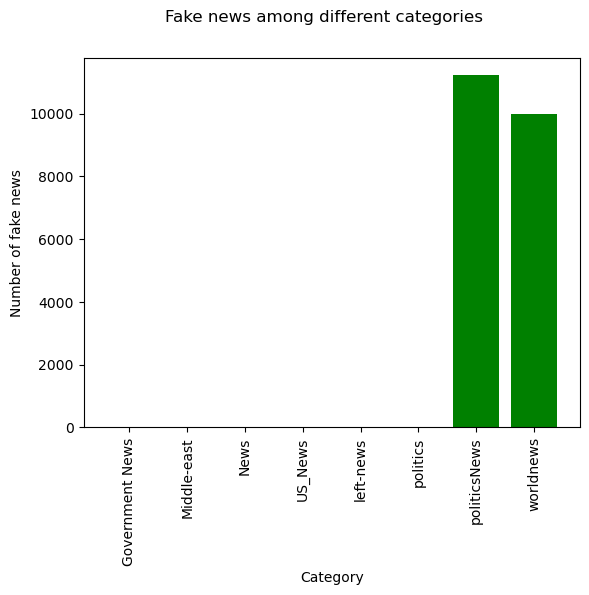

In [17]:
plt.suptitle('Fake news among different categories')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Category')

plt.bar(sub2.index, height=sub2.values, color='green')
#ax1.plot(x, y)
#ax2.plot(x, -y)

**As we have discovered, such features as**
* subject
* date

**Since these 2 features also have influence to decice whether the input is real or fake. It should also be included in the model**

**The goal of this notebook is to explore the use of NLP for detecting and classifying fake news. We will analyze different techniques and approaches and evaluate their effectiveness.**

# 4. Text preparation

In [18]:
nlp = df

## 5.1 Word Cloud visualization

**Here I am going to take one example and try visualize tfidf as a wordcloud.**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = nlp[nlp['label_encode'] == 1]['title'].iloc[0:500] # We will take a slice of fake news, to see what vocabulary there looks like
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names_out()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

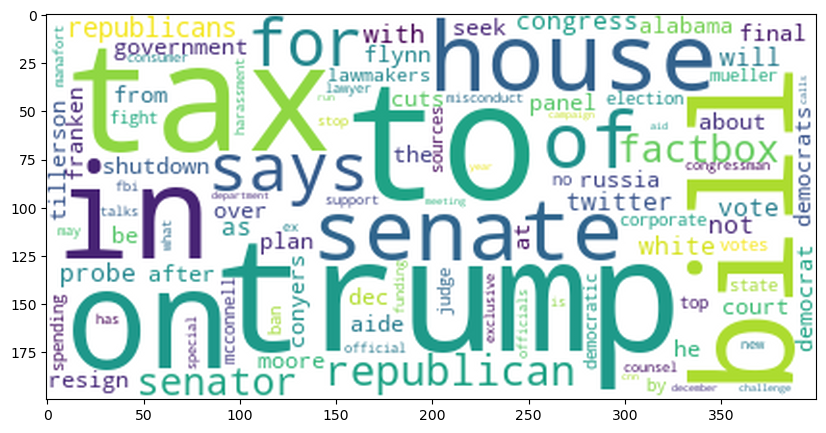

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='blackman')

**And we can also see out 'subject' feature in the foreground as it has been added manually in every title. Therefore, out vectorizer considers it as an important & frequent word.**

## 5.2 Tfidf-vectorizing

**First, I will tokenize words to pass it on to the SnowballStemmer method, which will take out lemmas from words.**

In [22]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nlp['title'] = nlp['title'].apply(lambda x: word_tokenize(str(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ClarkHuynh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**An important step in every NLP-task is to get the roots of words in order not to distract the model by 'different' words.**

In [23]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
nlp['title'] = nlp['title'].apply(lambda x: [snowball.stem(y) for y in x])

In [24]:
nlp['title'] = nlp['title'].apply(lambda x: ' '.join(x))

**Take the standard english bag of stopwords from nltk.**

In [25]:
from nltk.corpus import stopwords 

nltk.download('words')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package words to
[nltk_data]     /Users/ClarkHuynh/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ClarkHuynh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**And finally TfidfVectorizing. You can also take CountVectorizer, but I prefer Tfidf as it has masses of advantages.**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(nlp['title'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, nlp['label_encode'], test_size=0.33, random_state=1)

# 6. Model building

**I will use several approaches to solve the classification task, such as:** </br>
    1) SVM</br>
    2) Naive Bayes</br>
    3) XGBoost</br>

## 7.1 Linear SVC

In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

clf = LinearSVC(max_iter=100, C=1.0)
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)
print(cross_val_score(clf, X_text, nlp['label_encode'], cv=3))

[0.91105592 0.930384   0.92716165]


In [29]:
# Get accuracy, precision and recall
print('Overall performance of SVM')
print('Accuracy on testing set:', accuracy_score(y_pred_SVM, y_test))
print('Precision on testing set:', precision_score(y_pred_SVM, y_test))
print('Recall on testing set:', recall_score(y_pred_SVM, y_test))

Overall performance of SVM
Accuracy on testing set: 0.958706265256306
Precision on testing set: 0.9599206911202379
Recall on testing set: 0.9541103603603603


## 7.2 Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

clf2 = MultinomialNB()
clf2.fit(X_train, y_train)

y_pred_MNB = clf2.predict(X_test)
print(cross_val_score(clf2, X_text, nlp['label_encode'], cv=3))

[0.88957508 0.89399839 0.92883996]


In [31]:
# Get accuracy, precision and recall models
print('Overall performance of MNB')
print('Accuracy on testing set:', accuracy_score(y_pred_MNB, y_test))
print('Precision on testing set:', precision_score(y_pred_MNB, y_test))
print('Recall on testing set:', recall_score(y_pred_MNB, y_test))

Overall performance of MNB
Accuracy on testing set: 0.939924057499322
Precision on testing set: 0.9170089222489732
Recall on testing set: 0.955719557195572


## 7.3 XGBoost

In [32]:
from xgboost import XGBClassifier

clf3 = XGBClassifier(eval_metric='rmse', use_label_encoder=False)
clf3.fit(X_train, y_train)

y_pred_XGB = clf3.predict(X_test)
print(cross_val_score(clf3, X_text, nlp['label_encode'], cv=3))

/opt/anaconda3/envs/DataAnalyst/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/DataAnalyst/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/DataAnalyst/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/DataAnalyst/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[0.88729274 0.92293233 0.90903598]


In [33]:
# Get accuracy, precision and recall models
print('Overall performance of XGB')
print('Accuracy on testing set:', accuracy_score(y_pred_XGB, y_test))
print('Precision on testing set:', precision_score(y_pred_XGB, y_test))
print('Recall on testing set:', recall_score(y_pred_XGB, y_test))

Overall performance of XGB
Accuracy on testing set: 0.9370762137238947
Precision on testing set: 0.9587877071236369
Recall on testing set: 0.9140002700148508
